# readme
descrip: plot EOF analysis for Altimeter SSH for North Atlantic

update history: <br>
v1.0 DL 2021Mar30 <br>
v1.1 DL 2021Apr05

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import cartopy
cartopy.config['pre_existing_data_dir']='/scratch/group/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xesmf as xe

from eofs.xarray import Eof

# dask jupyter lab packages
# from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# load data

In [2]:
date_str = '2021Apr03'
infile1_obs = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/raw_data/CMEMS_2021Apr03/'
              'dt_global_allsat_msla_h_199301-201912_2023Mar24.nc')
lat1, lat2 = 20, 65
lon1, lon2 = -90+360, 360 # 90W
ds_obs = xr.open_dataset(infile1_obs)
sla_NA = ds_obs.sla.sel(latitude=slice(lat1, lat2),longitude=slice(lon1, lon2))*100 # unit: cm
sla_NA

<xarray.DataArray 'sla' (time: 324, latitude: 180, longitude: 360)>
array([[[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ..., -11.44, -11.23, -10.94],
        [   nan,    nan,    nan, ..., -10.97, -10.87, -10.9 ],
        [   nan,    nan,    nan, ..., -11.07, -10.9 , -10.98]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ...,  -7.29,  -7.56,  -7.84],
        [   nan,    nan,    nan, ...,  -7.34,  -7.16,  -7.08],
        [   nan,    nan,    nan, ...,  -7.85,  -7.59,  -7.44]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
...
        ...,
        [   nan,    nan,    nan, ...,  17.62,  17.11,  16.79],
        [   nan,    nan,    nan, ...,  18.81,  19.04,  19.53],
        [   nan,    nan,    nan, ...,  20.2 ,  21.17,  22.39]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ...,  15.59,  15.99,  16.7 ],
        [   nan,    nan,    nan, ...,  14.43,  14.41,  14.89],
        [   nan,    nan,    nan, ...,  15.08,  14.76,  14.88]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ...,  10.84,  12.05,  12.81],
        [   nan,    nan,    nan, ...,   7.62,   8.48,   9.56],
        [   nan,    nan,    nan, ...,   6.95,   7.27,   8.19]]])
Coordinates:
  * latitude   (latitude) float32 20.12 20.38 20.62 20.88 ... 64.38 64.62 64.88
  * longitude  (longitude) float32 270.1 270.4 270.6 270.9 ... 359.4 359.6 359.9
  * time       (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2019-12-15

# EOF analysis
compute yearly anomaly

In [3]:
sla_NA_yr = sla_NA.groupby('time.year').mean('time')
sla_NA_yr = sla_NA_yr.rename({'year':'time'}) # yr time series
sla_NA_yra = sla_NA_yr - sla_NA_yr.mean('time') # yra: yearly anomaly
sla_NA_yra

<xarray.DataArray 'sla' (time: 27, latitude: 180, longitude: 360)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., -5.75277778,
         -5.98722222, -6.18944444],
        [        nan,         nan,         nan, ..., -5.79188272,
         -5.87885802, -6.01061728],
        [        nan,         nan,         nan, ..., -6.08858025,
         -6.11098765, -6.17052469]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,  5.83805556,
          5.78527778,  5.52055556],
        [        nan,         nan,         nan, ...,  6.04978395,
          6.02614198,  5.71021605],
        [        nan,         nan,         nan, ...,  5.59891975,
          5.47151235,  5.12530864]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,  8.02138889,
          8.13194444,  8.14138889],
        [        nan,         nan,         nan, ...,  8.07811728,
          8.30530864,  8.52438272],
        [        nan,         nan,         nan, ...,  8.32891975,
          8.69901235,  9.12280864]]])
Coordinates:
  * latitude   (latitude) float32 20.12 20.38 20.62 20.88 ... 64.38 64.62 64.88
  * longitude  (longitude) float32 270.1 270.4 270.6 270.9 ... 359.4 359.6 359.9
  * time       (time) int64 1993 1994 1995 1996 1997 ... 2016 2017 2018 2019

use Square-root of cosine of latitude as weights. see https://ajdawson.github.io/eofs/latest/examples/nao_xarray.html

In [4]:
coslat = np.cos(np.deg2rad(sla_NA_yra.coords['latitude'].values)).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sla_NA_yra, weights=wgts)
variance_fractions = solver.varianceFraction(neigs=3)
variance_fractions

<xarray.DataArray 'variance_fractions' (mode: 3)>
array([0.31544971, 0.11049827, 0.06273101])
Coordinates:
  * mode     (mode) int64 0 1 2
Attributes:
    long_name:  variance_fractions

# make pics
plot EOF functions (eofs)

<xarray.DataArray 'eofs' (mode: 3, latitude: 180, longitude: 360)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,  0.00346376,
          0.00357014,  0.00364198],
        [        nan,         nan,         nan, ...,  0.00349208,
          0.00359363,  0.00366078],
        [        nan,         nan,         nan, ...,  0.00345146,
          0.00354126,  0.00361461]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,  0.00289941,
          0.00307282,  0.00328495],
        [        nan,         nan,         nan, ...,  0.00302748,
          0.00320183,  0.0034291 ],
        [        nan,         nan,         nan, ...,  0.00331759,
          0.00350444,  0.00373801]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., -0.00495596,
         -0.00488629, -0.00474197],
        [        nan,         nan,         nan, ..., -0.00523602,
         -0.00519812, -0.00510268],
        [        nan,         nan,         nan, ..., -0.00519163,
         -0.0051974 , -0.00516484]]])
Coordinates:
  * mode       (mode) int64 0 1 2
  * latitude   (latitude) float32 20.12 20.38 20.62 20.88 ... 64.38 64.62 64.88
  * longitude  (longitude) float32 270.1 270.4 270.6 270.9 ... 359.4 359.6 359.9
Attributes:
    long_name:  empirical_orthogonal_functions

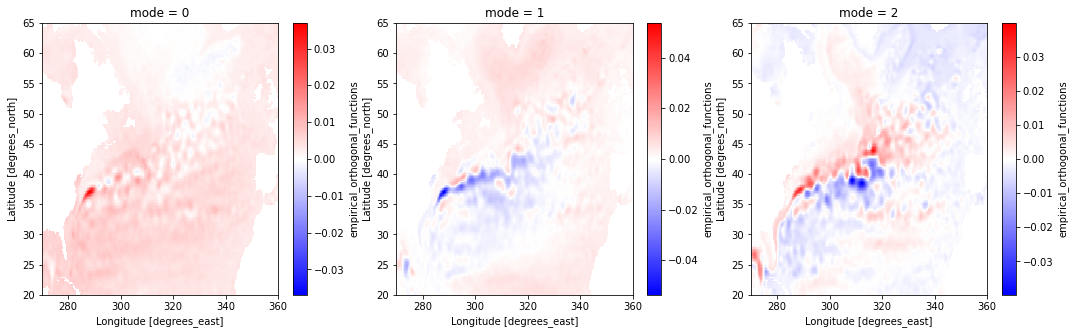

In [11]:
eofs = solver.eofs(neofs=3)

fig, axes = plt.subplots(1,3,figsize=(18,5))
eofs.sel(mode=0).plot(ax=axes[0], cmap='bwr')
eofs.sel(mode=1).plot(ax=axes[1], cmap='bwr')
eofs.sel(mode=2).plot(ax=axes[2], cmap='bwr')
eofs

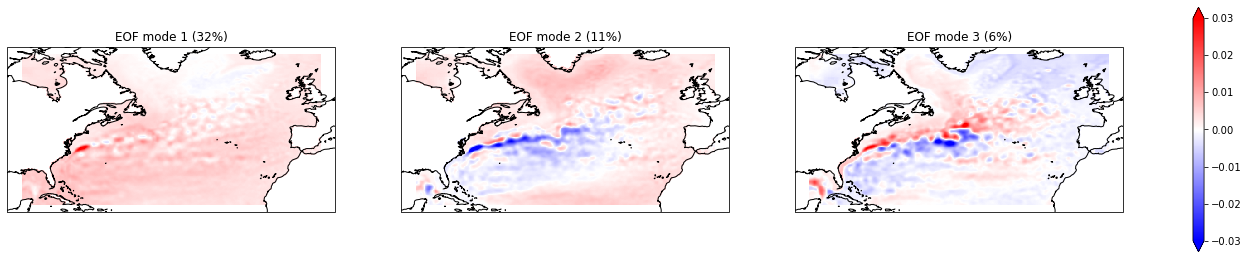

In [21]:
eofs = solver.eofs(neofs=3)
fig = plt.figure(figsize=(25, 6))
pc = cartopy.crs.PlateCarree()
ax1 = plt.subplot(131,projection=pc)
ax1.coastlines()
ax1.pcolormesh(sla_NA_yra.longitude, sla_NA_yra.latitude, eofs.sel(mode=0), vmin=-0.03, vmax=0.03,
               transform=pc,cmap='bwr')
ax1.set_title('EOF mode 1 (32%)')

ax2 = plt.subplot(132,projection=pc)
ax2.coastlines()
ax2.pcolormesh(sla_NA_yra.longitude, sla_NA_yra.latitude, eofs.sel(mode=1), vmin=-0.03, vmax=0.03,
               transform=pc,cmap='bwr')
ax2.set_title('EOF mode 2 (11%)')

ax3 = plt.subplot(133,projection=pc)
ax3.coastlines()
subplt3=ax3.pcolormesh(sla_NA_yra.longitude, sla_NA_yra.latitude, eofs.sel(mode=2), vmin=-0.03,vmax=0.03,
               transform=pc,cmap='bwr')
ax3.set_title('EOF mode 3 (6%)')

# Now adding the colorbar
cb = fig.colorbar(subplt3, ax=[ax1,ax2,ax3], shrink=0.75, extend='both')
# cb.set_label('SSH [cm]')

plot principal components time series (pc)

<xarray.DataArray 'pcs' (time: 27, mode: 3)>
array([[-1.39752685, -1.28865786,  0.29603102],
       [-0.95433946, -2.32430679,  0.20125826],
       [-0.81565476, -1.89238116,  0.47144428],
       [-1.21447514, -0.41069496, -1.41853733],
       [-1.00042966,  0.08327935, -0.92955302],
       [-0.65769457,  0.39971855, -0.94426864],
       [-0.3117234 , -0.40789627,  0.83394444],
       [-0.31930822, -1.43217717,  1.24015456],
       [-0.54476038,  0.1021289 , -0.06469924],
       [-0.19410569, -0.35495651, -1.06236218],
       [ 0.15605487,  0.53171676, -2.1182911 ],
       [-0.43145052,  0.76147444, -1.21510901],
       [-0.859375  ,  0.83885009, -0.02313357],
       [-0.55220011,  0.83281014,  0.37895748],
       [-0.28700197,  0.56816725, -0.08925115],
       [-0.19934074,  0.28507703,  0.36384357],
       [ 0.18073107,  0.23481955,  0.31475168],
       [-0.56058801,  1.79217109,  0.42011494],
       [-0.56452107,  1.67334648,  1.05757694],
       [ 0.38826208,  0.55727717,  1.3097991 ],
       [ 0.42767181,  1.53300944,  0.78374901],
       [ 0.95176224,  0.117931  ,  1.77172475],
       [ 1.34925151, -0.50186025,  1.48126447],
       [ 1.70943221, -0.76265342, -0.10412523],
       [ 1.63627078, -0.15163971, -1.25467182],
       [ 1.85172625, -0.61215774, -1.14959528],
       [ 2.21333272, -0.1723954 , -0.55101692]])
Coordinates:
  * time     (time) int64 1993 1994 1995 1996 1997 ... 2015 2016 2017 2018 2019
  * mode     (mode) int64 0 1 2

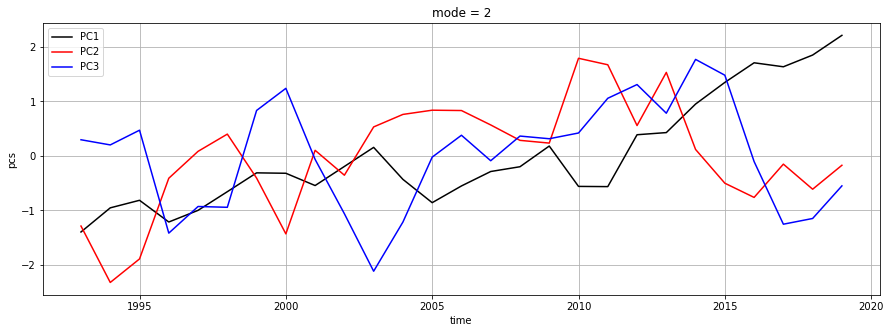

In [6]:
pcs = solver.pcs(npcs=3, pcscaling=1)
fig, axes = plt.subplots(1,1,figsize=(15,5))
pcs.sel(mode=0).plot(ax=axes, color='k',label='PC1')
pcs.sel(mode=1).plot(ax=axes, color='r',label='PC2')
pcs.sel(mode=2).plot(ax=axes, color='b',label='PC3')
plt.legend()
plt.grid()
pcs

plot Empirical orthogonal functions (EOFs) expressed as the correlation between the principal component time series (PCs) and the time series of the Eof input dataset at each grid point.

<xarray.DataArray 'eofs' (mode: 3, latitude: 180, longitude: 360)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,  0.67985422,
          0.68149449,  0.68231884],
        [        nan,         nan,         nan, ...,  0.6866142 ,
          0.69013741,  0.69097861],
        [        nan,         nan,         nan, ...,  0.67741679,
          0.68086399,  0.68132986]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,  0.336814  ,
          0.34715861,  0.3642435 ],
        [        nan,         nan,         nan, ...,  0.35230789,
          0.36392686,  0.38307414],
        [        nan,         nan,         nan, ...,  0.38537919,
          0.39878113,  0.41701278]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., -0.4337822 ,
         -0.4159421 , -0.39617315],
        [        nan,         nan,         nan, ..., -0.45909788,
         -0.4451693 , -0.429502  ],
        [        nan,         nan,         nan, ..., -0.45439362,
         -0.44562078, -0.43413939]]])
Coordinates:
  * mode       (mode) int64 0 1 2
  * latitude   (latitude) float32 20.12 20.38 20.62 20.88 ... 64.38 64.62 64.88
  * longitude  (longitude) float32 270.1 270.4 270.6 270.9 ... 359.4 359.6 359.9
Attributes:
    long_name:  correlation_between_pcs_and_sla

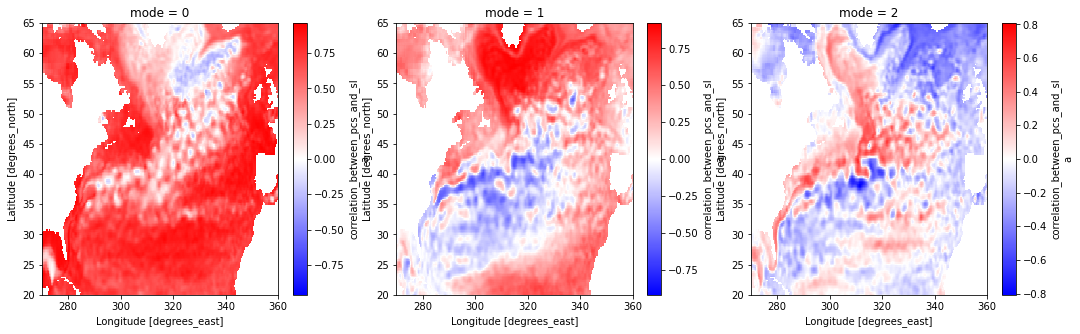

In [7]:
eofcorr = solver.eofsAsCorrelation(neofs=3)
fig, axes = plt.subplots(1,3,figsize=(18,5))
eofcorr.sel(mode=0).plot(ax=axes[0], cmap='bwr')
eofcorr.sel(mode=1).plot(ax=axes[1], cmap='bwr')
eofcorr.sel(mode=2).plot(ax=axes[2], cmap='bwr')
eofcorr